In [17]:
from os import listdir
from os.path import isfile, join
import pandas as pd
import numpy as np

images_names = [item for item in listdir('images/') if isfile(join('images/', item))]
mask_names = [item for item in listdir('images_masks/') if isfile(join('images_masks/', item))]


mask_names = [mask[:-9] for mask in mask_names]

images_names = [name[:-4] for name in images_names]

print(images_names.index("PAT_585_1130_552"))
combined_list = mask_names + images_names
unique_elements = []

for element in combined_list:
    if element not in mask_names or element not in images_names:
        unique_elements.append(element)


print(unique_elements)

634
['.DS_S']


In [5]:
df_own_features = pd.read_excel("metadata_with_feature_annotations.xlsx", sheet_name=2, header=0)

# df_own_features['assymmetry_own'] = df_own_features['assymmetry_own'] / 2.6
# df_own_features['color'] = df_own_features['color'] / 0.5


,img_id_,color,assymmetry_own
0,PAT_1516_1765_530.png,0.0,0.0
1,PAT_46_881_939.png,1.0,1.3
2,PAT_1545_1867_547.png,1.0,2.6
3,PAT_684_1302_588.png,1.0,0.0
4,PAT_1549_1882_230.png,1.0,1.3
...,...,...,...
87,PAT_430_848_476.png,1.5,2.6
88,PAT_419_832_706.png,1.5,2.6
89,PAT_1423_1472_18.png,0.5,2.6
90,PAT_55_84_506.png,1.5,0.0


In [83]:
df_own_features['color'] = df_own_features['color'] / 0.5

In [93]:
import os

from MyModel import ProcessImages
import matplotlib.pyplot as plt


#################
### COMSTANTS ###
#################

file_data = 'metadata_withmasks.csv'
image_folder = 'test_images' + os.sep
mask_folder = 'test_images_mask' + os.sep
file_features = 'feature_data.csv'

df_features = pd.read_csv(file_features)

df_features_sorted = df_features.sort_values('img_id')
df_own_features_sorted = df_own_features.sort_values('img_id_')

df_features_sorted.reset_index(drop=True, inplace=True)
df_own_features_sorted.reset_index(drop=True, inplace=True)

frames = [df_features_sorted, df_own_features_sorted]
df_concated = pd.concat(frames, axis=1)

df_concated = df_concated[df_concated["assymmetry_own"] == 1]

my_list = df_concated.assymmetry.tolist()

df_concated = df_concated.sort_values('assymmetry')
df_concated
# asym1 = df_features_sorted.assymmetry.tolist()
# asym2 = df_own_features_sorted.assymmetry.tolist()



# print(asym1)
# print("-----------------------------------")
# print(asym2)

# plt.scatter(asym1, asym2)

,img_id,assymmetry,red_var,green_var,blue_var,hue_var,sat_var,val_var,dom_hue,dom_sat,dom_val,compactness,convexity,img_id_,color,assymmetry_own
54,PAT_419_832_706.png,0.04030,0.019040,0.016170,0.016100,0.010796,0.025130,0.019030,0.97200,0.69340,0.3518,0.720,0.017,PAT_419_832_706.png,3.0,1.0
44,PAT_302_651_529.png,0.07180,0.008090,0.015350,0.016080,0.003750,0.008220,0.008090,0.96400,0.18850,0.6820,0.718,0.020,PAT_302_651_529.png,2.0,1.0
48,PAT_374_762_794.png,0.08300,0.009094,0.013080,0.017990,0.011650,0.011130,0.009094,0.01688,0.30000,0.7390,0.689,0.011,PAT_374_762_794.png,3.0,1.0
9,PAT_1276_957_406.png,0.09100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.06450,0.59900,0.6313,0.752,0.036,PAT_1276_957_406.png,2.0,1.0
17,PAT_1545_1867_547.png,0.09320,0.000475,0.000585,0.000205,0.000629,0.001285,0.000469,0.00843,0.46100,0.6260,0.746,0.062,PAT_1545_1867_547.png,2.0,1.0
26,PAT_183_283_495.png,0.09393,0.005390,0.008766,0.011520,0.752000,0.001096,0.008804,0.06450,0.09830,0.4630,0.713,0.052,PAT_183_283_495.png,3.0,1.0
56,PAT_430_848_476.png,0.10150,0.003054,0.005962,0.004852,0.003994,0.006660,0.003050,0.01508,0.33960,0.5923,0.727,0.019,PAT_430_848_476.png,3.0,1.0
14,PAT_1431_1495_511.png,0.10657,0.001475,0.003323,0.005000,0.001123,0.005795,0.001475,0.06137,0.34640,0.5570,0.753,0.026,PAT_1431_1495_511.png,3.0,1.0
55,PAT_42_58_13.png,0.10810,0.003050,0.002716,0.002007,0.000541,0.002815,0.003050,0.02269,0.60740,0.5150,0.758,0.037,PAT_42_58_13.png,2.0,1.0
85,PAT_882_1677_789.png,0.10944,0.032840,0.038180,0.034640,0.003654,0.030730,0.032840,0.04060,0.64100,0.8000,0.844,0.058,PAT_882_1677_789.png,3.0,1.0


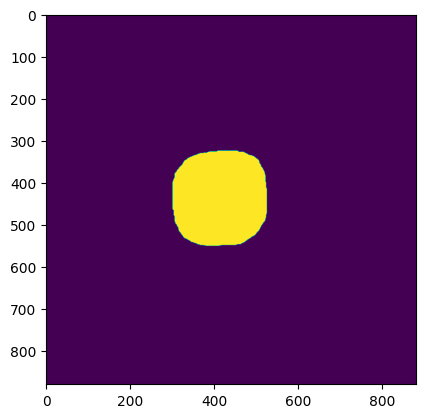

In [102]:
from prep_image import prep_im_and_mask

im, mask = prep_im_and_mask("PAT_419_832_706.png", image_folder, mask_folder)

plt.imshow(mask)